<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%201%20Pandas/TUK/TUK_Assignment_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Fraud Detection EDA

This dataset is about online payments big dataset that can be used for modelling and testing for predicting fraud. This workbook will explain the steps on EDA and the insights from the dataset. Below are the data definition :

---

Attribute Information:

| Attribute | Description |
| --- | --- |
| **Step** | A unit of time where 1 step equals 1 hour|
|**Type** | Type of online transaction |
| **Amount** | The amount of the transaction |
| **nameOrig** | Customer starting the transaction |
| **oldbalanceOrg** | Balance before the transaction |
| **newbalanceOrig** | Balance after the transaction |
| **nameDest** | recipient of the transaction|
| **oldbalanceDest** | initial balance of 9. recipient before the transaction|
| **newbalanceDest** | the new balance of recipient after the transaction|
| **isFraud** |fraud transaction|

**GROUP** **MEMBERS** **:**
1. AMIRAH RAIHANAH BINTI ABDUL RAHIM A20EC0182
2. MYZA NAZIFA BINTI NAZRY A20EC0216

## Downloading the Dataset

For EDA, we have chosen to use the Fraud Detection Dataset from Kaggle. Below are the link to the dataset:

[Dataset : Fraud Detection](https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset)



Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from google.colab import drive

drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FraudDetection.csv'

The dataset has been downloaded and extracted. We use pandas to read the csv file using read_csv(file).

In [ ]:
df = pd.read_csv(filename)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Since the dataset is big, we use the chunking method to split the data into chunks. The chunked data can then be used for data preparation and cleaning.

In [ ]:
result = None
for chunk in pd.read_csv(filename, chunksize=1000):
    voters_street = chunk[
        "type"]
    chunk_result = voters_street.value_counts()
    if result is None:
        result = chunk_result
    else:
        result = result.add(chunk_result, fill_value=0)

result.sort_values(ascending=False, inplace=True)
print(result)

CASH_OUT    2237500.0
PAYMENT     2151495.0
CASH_IN     1399284.0
TRANSFER     532909.0
DEBIT         41432.0
Name: type, dtype: float64


**Next step**

To reduce the memory of the data, we have choosen to only use 10% of the data which consist of 636262 rows of data. Below shown how the data is choosen to be the sample data.


In [ ]:
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df = pd.read_csv(filename, skiprows=skip)
print( n)
print( s)
df

6362620
636262


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
1,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
2,1,PAYMENT,3099.97,C249177573,20771.00,17671.03,M2096539129,0.00,0.00,0,0
3,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
4,1,PAYMENT,8009.09,C1053967012,10968.00,2958.91,M295304806,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
636257,737,CASH_OUT,2194533.79,C1907033447,2194533.79,0.00,C1163998762,272242.91,2466776.70,1,0
636258,738,CASH_OUT,297846.16,C384242072,297846.16,0.00,C175252004,11436080.11,11733926.27,1,0
636259,738,TRANSFER,114490.39,C983453370,114490.39,0.00,C1060799549,0.00,0.00,1,0
636260,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0


To continue with the data, we have decided to not use the "IsFlaggedFraud" column. This column will be dropped.

In [ ]:
df.drop(['isFlaggedFraud'], axis=1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
1,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0
2,1,PAYMENT,3099.97,C249177573,20771.00,17671.03,M2096539129,0.00,0.00,0
3,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0
4,1,PAYMENT,8009.09,C1053967012,10968.00,2958.91,M295304806,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
636257,737,CASH_OUT,2194533.79,C1907033447,2194533.79,0.00,C1163998762,272242.91,2466776.70,1
636258,738,CASH_OUT,297846.16,C384242072,297846.16,0.00,C175252004,11436080.11,11733926.27,1
636259,738,TRANSFER,114490.39,C983453370,114490.39,0.00,C1060799549,0.00,0.00,1
636260,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1


##Data Preparation and Cleaning

Data preparation and cleaning are crucial to improve accuracy and realiability of the result. This process will remove inconsistent and missing or null values from the dataset which may occur from computer or human error. This step will produce a consistent dataset.



Firstly, we check the info of the dataset used. The function will display the data types of all rows in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB


In [ ]:
df.isnull().sum() 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Step above shown that there is no null values in the dataset hence it is ready for the next step. Next, we need to check for Nan value.

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Lastly, we check if there are any duplicate value in the dataset.

In [ ]:
df.drop_duplicates()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
1,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
2,1,PAYMENT,3099.97,C249177573,20771.00,17671.03,M2096539129,0.0,0.00,0,0
3,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.0,2719172.89,0,0
4,1,PAYMENT,8009.09,C1053967012,10968.00,2958.91,M295304806,0.0,0.00,0,0


In [ ]:
df.shape

(636262, 11)

## Exploratory Analysis and Visualization

The data is now prepped for analysis and visualization. From the prepped data, we can analyse and visualize for better understanding of the data.



In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,636262.000000,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,636262.000000,636262.000000
mean,243.386954,1.798021e+05,8.313705e+05,8.527597e+05,1.096906e+06,1.220922e+06,0.001254,0.000005
std,142.248014,6.042955e+05,2.874258e+06,2.910325e+06,3.329895e+06,3.597254e+06,0.035393,0.002171
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.342961e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.507630e+04,1.415541e+04,0.000000e+00,1.318964e+05,2.142875e+05,0.000000,0.000000
75%,335.000000,2.090247e+05,1.073475e+05,1.444538e+05,9.437271e+05,1.113573e+06,0.000000,0.000000
max,741.000000,7.382349e+07,4.169084e+07,4.143236e+07,3.281945e+08,3.279981e+08,1.000000,1.000000


Firstly, we will see the distribution of the 'type' data to see which type has the largest distribution. From there, we can see the trends on which transaction lead to fraud.

In [ ]:
import plotly.express as px
type_transaction = df["type"].value_counts()
transaction = type_transaction.index
quantity = type_transaction.values

# plotting pie chart
fig = px.pie(df,
            values = quantity,
            names = transaction, 
            hole = 0.4,
            title = "Distribution of Transaction Type")
fig.show()

Next, from the graph below we can see that 'cash_out' and 'payment' are the most used transaction type. This graph tell us that these 2 types tend to be the type that caused fraud.

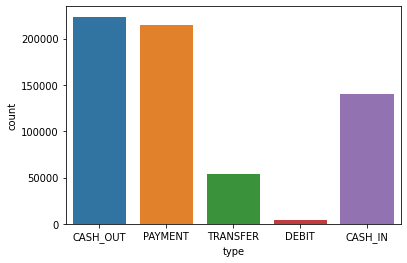

In [ ]:
import seaborn as sns
sns.countplot(x='type',data=df)

Moving on, we will check the correlation of the 'IsFraud' column with the other features. Here, we will find out which feature contribute most to fraud.

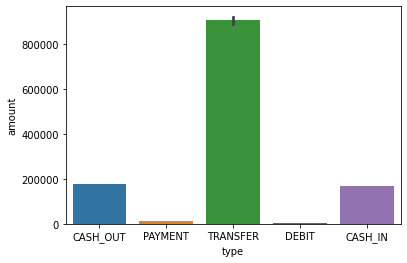

In [ ]:
sns.barplot(x='type',y='amount',data=df)

The graph above shows that eventhough 'payment' and 'cash_out' is the most used type of transaction but it shows that 'transfer' type has the most amount transferred to the recipient.

In [ ]:
correlation = df.corr()
correlation["isFraud"].sort_values(ascending=False)


isFraud           1.000000
amount            0.071092
isFlaggedFraud    0.061276
step              0.032371
oldbalanceOrg     0.009146
newbalanceDest   -0.000342
oldbalanceDest   -0.006788
newbalanceOrig   -0.007885
Name: isFraud, dtype: float64

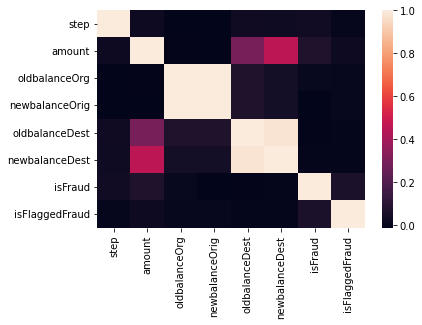

In [ ]:
from seaborn import heatmap
heatmap(df.corr())

Next, we will check the data whether the data collected is balanced or not. This means that the outcome will show if the number of fraud detected and not detected are balanced.

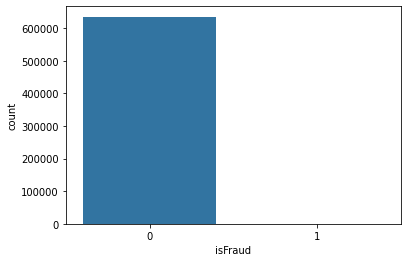

In [ ]:
sns.countplot(x='isFraud',data=df)

Based on the graph above, it shows that the number of fraud are imbalanced towards the number of no fraud detected. This shows that the data are not reliable and inconsistent.

## Asking and Answering Questions
The question and answer below will help us to understand and get more insights on the data above. We can further our analysis hence can come up with a conclusion from our EDA.



#### Q1: Who are the top 10 richest customer who had the biggest lost from the fraud?

To solve:
* create new columns with new data gained from deriving formula.
* new column is called 'loss_from_fraud'
* sort the data in descending
* use head function to get the first 10 data

In [ ]:
t=df.loc[df['isFraud']==1,['nameOrig','oldbalanceOrg','newbalanceOrig']]

In [ ]:
t['loss_from_fraud']=t['oldbalanceOrg']-t['newbalanceOrig']
t3=t.sort_values(by=['loss_from_fraud','oldbalanceOrg'],ascending=False)
t3.head(10)

,nameOrig,oldbalanceOrg,newbalanceOrig,loss_from_fraud
601111,C1295280435,23752520.60,13752520.60,10000000.0
636260,C88849251,25674547.89,15674547.89,10000000.0
629715,C475879190,23441041.46,13441041.46,10000000.0
598880,C417104903,19033760.73,9033760.73,10000000.0
103072,C1843531771,18931607.89,8931607.89,10000000.0
105487,C2037845109,18267760.50,8267760.50,10000000.0
607317,C642807002,15912204.00,5912204.00,10000000.0
636252,C1891630790,11810044.85,1810044.85,10000000.0
103059,C1438388258,10000000.00,0.00,10000000.0
170619,C525906402,10000000.00,0.00,10000000.0


#### Q2: Who are the top 10 richest recipient who had biggest gain when fraud occured?

To solve:
* create new columns with new data gained from deriving formula.
* new column is called 'gain_from_fraud'
* sort the data in descending
* use head function to get the first 10 data

In [ ]:
t=df.loc[df['isFraud']==1,['nameDest', 'oldbalanceDest', 'newbalanceDest']]

In [ ]:
t['gain_from_fraud']=t['newbalanceDest']-t['oldbalanceDest']
t4=t.sort_values(by=['gain_from_fraud','newbalanceDest'],ascending=False)
t4.head(10)

,nameDest,oldbalanceDest,newbalanceDest,gain_from_fraud
170619,C43869769,2145275.47,12145275.47,10000000.00
360950,C1423246212,499610.16,10499610.16,10000000.00
628298,C325570373,235170.07,10235170.07,10000000.00
324609,C709815552,107593.45,10107593.45,10000000.00
103059,C1089455271,81810.42,10081810.42,10000000.00
634708,C305170140,0.00,10000000.00,10000000.00
599704,C308220962,10662599.15,20662599.15,10000000.00
341813,C1459698370,61469.05,9872573.54,9811104.49
496783,C1830194909,1968332.75,11740892.10,9772559.35
628384,C1058427074,100936.07,9569000.12,9468064.05


Q3 - Which customer lost the most money?

To solve:
* create new columns with new data gained from deriving formula.
* new column is called 'gain_from_fraud'
* sort the data in descending
* use tail function to get the last data

In [ ]:
t=df.loc[df['isFraud']==1,['nameDest', 'oldbalanceDest', 'newbalanceDest']]

In [ ]:
t['gain_from_fraud']=t['newbalanceDest']-t['oldbalanceDest']
t4=t.sort_values(by=['gain_from_fraud','newbalanceDest'],ascending=False)
t4.tail(1)

,nameDest,oldbalanceDest,newbalanceDest,gain_from_fraud
0,C38997010,21182.0,0.0,-21182.0


#### Q4:Top 20 step number that fraud occured

To solve:
* import matplot lib to use the bar plot
* set the plot size and colour
* use data from column 'isFraud' and 'step'


Text(0, 0.5, 'Fraud count by step')

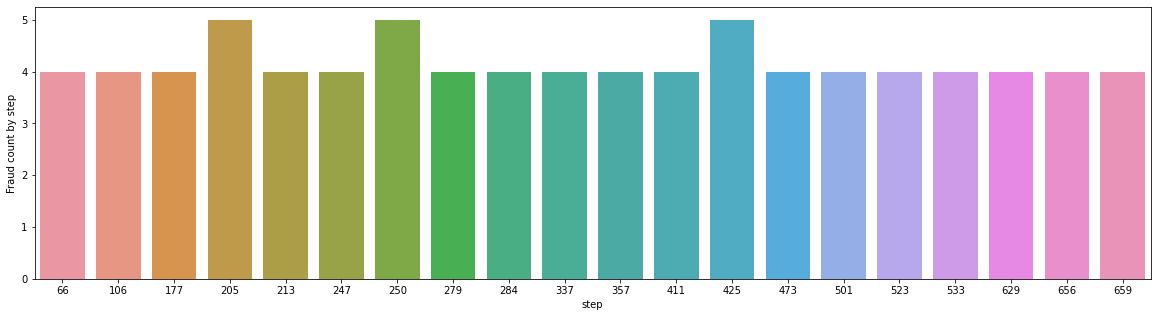

In [ ]:
import matplotlib.pyplot as plt
t=pd.DataFrame(df.groupby(by=df['step'])['isFraud'].sum())
t2=t.sort_values(by='isFraud', ascending=False).head(20)
t2 = t2.rename_axis('step').reset_index()
plt.figure(figsize=(20,5))
sns.barplot(data=t2,x='step', y='isFraud',)
plt.ylabel('Fraud count by step')

#### Q5: Which customer commit the largest fraud?
To solve:
* create new columns with new data gained from deriving formula.
* new column is called 'gain_from_fraud'
* sort the data in descending
* use head function to get the first data



In [ ]:
t=df.loc[df['isFraud']==1,['nameDest', 'oldbalanceDest', 'newbalanceDest']]

In [ ]:
t['gain_from_fraud']=t['newbalanceDest']-t['oldbalanceDest']
t4=t.sort_values(by=['gain_from_fraud','newbalanceDest'],ascending=False)
t4.head(1)

,nameDest,oldbalanceDest,newbalanceDest,gain_from_fraud
170619,C43869769,2145275.47,12145275.47,10000000.0


## Inferences and Conclusion

In conclusion, the fraud detection dataset is imbalanced and not accurate to be used as a model. Next, from the data above we can also see that there are customers who lost from the fraud. This dataset has shown us that the fraud can be detected by checking the old balance, new balance and balance after the transaction. Next, we can see from the plot that the type of payment made 'cash_out' and 'payment' lead to fraud the most. Next, we can tell that there are customer who gained from fraud and loss from fraud. All in all, this dataset has shown us that fraud can be detected by analyzing series of attributes and correlating them to find the answers.

## References and Future Work



1.   How to do EDA - [EDA STEPS](https://www.indeed.com/career-advice/career-development/how-to-conduct-exploratory-data-analysis)
2.   Kaggle Dataset - [Fraud Detection](https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset)

